# HarvestStat Data Analysis - South Africa

## Issue 1: Year-off problem

In [1]:
# Reproduce the year-off problem in FDW-ZA crop data
import json, requests
import pandas as pd
host = 'https://fdw.fews.net'
auth = tuple(json.loads(open('token.json', "r").read()))
parameters = {
    'format': 'json',
    'country': 'South Africa',
    'product': 'R011',
    'survey_type': 'crop:best'
}
endpoint = '/api/cropproductionindicatorvalue/'
response = requests.get(host + endpoint, auth=auth, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
# Remove national level values
df = df[df['fnid'] != 'ZA1994A0'].reset_index(drop=True)
# Table of "Maize Grain (Yellow)"
sub = df[
    (df['season_name'] == 'Summer') &
    (df['product'].isin(['Maize Grain (Yellow)'])) &
    (df['indicator'] == 'Quantity Produced')
]
sub.pivot_table(
    index=['start_date','period_date','season_name','season_type','season_date','season_year'],
    columns='product',values='value',aggfunc='sum'
).tail()

,,,,,product,Maize Grain (Yellow)
start_date,period_date,season_name,season_type,season_date,season_year,
2018-04-01,2018-04-30,Summer,Harvest,2018-04-30,Summer 2018,6309463.0
2019-04-01,2019-04-30,Summer,Harvest,2019-04-30,Summer 2019,5817800.0
2020-04-01,2020-04-30,Summer,Harvest,2020-04-30,Summer 2020,6910120.0
2021-04-01,2021-04-30,Summer,Harvest,2021-04-30,Summer 2021,7816555.0
2022-04-01,2022-04-30,Summer,Harvest,2022-04-30,Summer 2022,7782450.0


## (Resolved) Issue 2: Duplication between multiple “publication_name”

In [2]:
# Reproduce the year-off problem in FDW-ZA crop data
import json, requests
import pandas as pd
host = 'https://fdw.fews.net'
auth = tuple(json.loads(open('token.json', "r").read()))
parameters = {
    'format': 'json',
    'country': 'South Africa',
    'product': 'R011',
    'survey_type': 'crop:best'
}
endpoint = '/api/cropproductionindicatorvalue/'
response = requests.get(host + endpoint, auth=auth, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
# Remove national level values
df = df[df['fnid'] != 'ZA1994A0'].reset_index(drop=True)
# Add "None" to undefined [publication_name]
df.loc[df['publication_name'] == '','publication_name'] = 'None'
# Table of "Maize Grain (Yellow)"
sub = df[
    (df['season_name'] == 'Summer') &
    (df['product'].isin(['Maize Grain (Yellow)'])) &
    (df['indicator'] == 'Quantity Produced')
]
sub.pivot_table(
    index=['start_date','period_date','season_date','season_year'],
    columns=['product','publication_name'],values='value',aggfunc='sum'
).tail()

product                                                                   Maize Grain (Yellow)  \
publication_name                               CEC Final Estimate, November 2020, South Africa   
start_date period_date season_date season_year                                                   
2018-04-01 2018-04-30  2018-04-30  Summer 2018                                             NaN   
2019-04-01 2019-04-30  2019-04-30  Summer 2019                                             NaN   
2020-04-01 2020-04-30  2020-04-30  Summer 2020                                       6910120.0   
2021-04-01 2021-04-30  2021-04-30  Summer 2021                                             NaN   
2022-04-01 2022-04-30  2022-04-30  Summer 2022                                             NaN   

product                                                                                         \
publication_name                               CEC Final Estimate, November 2021, South Africa   
start_date period_date season_date season_year                                                   
2018-04-01 2018-04-30  2018-04-30  Summer 2018                                             NaN   
2019-04-01 2019-04-30  2019-04-30  Summer 2019                                             NaN   
2020-04-01 2020-04-30  2020-04-30  Summer 2020                                             NaN   
2021-04-01 2021-04-30  2021-04-30  Summer 2021                                       7816555.0   
2022-04-01 2022-04-30  2022-04-30  Summer 2022                                             NaN   

product                                                                                         \
publication_name                               CEC Final Estimate, November 2022, South Africa   
start_date period_date season_date season_year                                                   
2018-04-01 2018-04-30  2018-04-30  Summer 2018                                             NaN   
2019-04-01 2019-04-30  2019-04-30  Summer 2019                                             NaN   
2020-04-01 2020-04-30  2020-04-30  Summer 2020                                             NaN   
2021-04-01 2021-04-30  2021-04-30  Summer 2021                                             NaN   
2022-04-01 2022-04-30  2022-04-30  Summer 2022                                       7782450.0   

product                                                                                        \
publication_name                               CEC Final Estimate, October 2019, South Africa   
start_date period_date season_date season_year                                                  
2018-04-01 2018-04-30  2018-04-30  Summer 2018                                            NaN   
2019-04-01 2019-04-30  2019-04-30  Summer 2019                                      5817800.0   
2020-04-01 2020-04-30  2020-04-30  Summer 2020                                            NaN   
2021-04-01 2021-04-30  2021-04-30  Summer 2021                                            NaN   
2022-04-01 2022-04-30  2022-04-30  Summer 2022                                            NaN   

product                                                                                          \
publication_name                               CEC Final Estimate, September 2016, South Africa   
start_date period_date season_date season_year                                                    
2018-04-01 2018-04-30  2018-04-30  Summer 2018                                              NaN   
2019-04-01 2019-04-30  2019-04-30  Summer 2019                                              NaN   
2020-04-01 2020-04-30  2020-04-30  Summer 2020                                              NaN   
2021-04-01 2021-04-30  2021-04-30  Summer 2021                                              NaN   
2022-04-01 2022-04-30  2022-04-30  Summer 2022                                              NaN   

product                                                                    

## (Resolved) Issue 3: Duplication between "Sorghum" and "Wheat"

In [3]:
# Reproduce the year-off problem in FDW-ZA crop data
import json, requests
import pandas as pd
host = 'https://fdw.fews.net'
auth = tuple(json.loads(open('token.json', "r").read()))
parameters = {
    'format': 'json',
    'country': 'South Africa',
    'product': 'R011',
    'survey_type': 'crop:best'
}
endpoint = '/api/cropproductionindicatorvalue/'
response = requests.get(host + endpoint, auth=auth, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
# Remove national level values
df = df[df['fnid'] != 'ZA1994A0'].reset_index(drop=True)
# Table of all products
sub = df[
    (df['season_name'] == 'Summer') &
    (df['indicator'] == 'Quantity Produced')
]
sub.pivot_table(
    index=['start_date','period_date','season_name','season_type','season_date','season_year'],
    columns='product',values='value',aggfunc='sum'
).tail(25)

,,,,,product,Maize Grain (White),Maize Grain (Yellow),Sorghum
start_date,period_date,season_name,season_type,season_date,season_year,,,
1998-04-01,1998-04-30,Summer,Harvest,1998-04-30,Summer 1998,4459500.0,2744000.0,264600.0
1999-04-01,1999-04-30,Summer,Harvest,1999-04-30,Summer 1999,4457807.0,2574500.0,155950.0
2000-04-01,2000-04-30,Summer,Harvest,2000-04-30,Summer 2000,6459508.0,3986440.0,352450.0
2001-04-01,2001-04-30,Summer,Harvest,2001-04-30,Summer 2001,4299089.0,3184175.0,175580.0
2002-04-01,2002-04-30,Summer,Harvest,2002-04-30,Summer 2002,5782599.0,4249865.0,197275.0
2003-04-01,2003-04-30,Summer,Harvest,2003-04-30,Summer 2003,6586647.0,3090858.0,219513.0
2004-04-01,2004-04-30,Summer,Harvest,2004-04-30,Summer 2004,5975890.0,3714180.0,363000.0
2005-04-01,2005-04-30,Summer,Harvest,2005-04-30,Summer 2005,6743455.0,4972493.0,260000.0
2006-04-01,2006-04-30,Summer,Harvest,2006-04-30,Summer 2006,4277326.0,2509230.0,96000.0


## Validation with FAO's National Production and CHIRPS Precipitation

Summer-Maize Correlation:
           FAO        HS      PRCP
FAO   1.000000  0.945237  0.400333
HS    0.945237  1.000000  0.472565
PRCP  0.400333  0.472565  1.000000


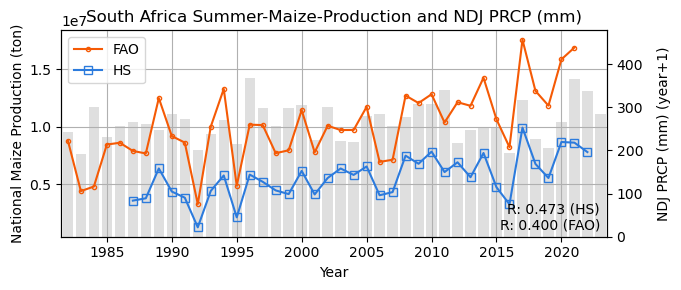

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import proplot as pplot
# Load Crop Data ------------------------------------- #
country_name, season_name, product_name_fdw, product_name_fao,  = 'South Africa', 'Summer', 'Maize', 'Maize (corn)'
shape_code, prcp_start_month, prcp_season_name, prcp_year_offset = 'ZA1994A0', 11, 'NDJ PRCP (mm)', +1
# HarvestStat
df = pd.read_csv('../public/hvstat_data_v1.0.csv', index_col=0)
df = df[
    (df['country'] == country_name) &
    (df['season_name'] == season_name) &
    (df['product'].isin([product_name_fdw]))
].copy()
df['year'] = df['harvest_year']
data_hs = df.pivot_table(index='year',columns='product',values='production',aggfunc='sum').squeeze()
# FAO-STAT
df = pd.read_csv('../data/crop/adm_fao_stat.csv', index_col=0)
data_fao = df[
    (df['Area'] == country_name) &
    (df['Item'] == product_name_fao) &
    (df['Element'] == 'Production')
].set_index('Year')['Value']
# Merge
data = pd.concat([data_fao,data_hs], axis=1, keys=['FAO','HS']).sort_index()
data = data.reindex(np.array(range(1982,2024)))
# ---------------------------------------------------- #
# Load precipitation --------------------------------- #
fn = '../data/prcp_chirps-v2.hdf'
prcp_nat = pd.read_hdf(fn)[shape_code].resample('1M').agg('sum')
prcp_nat.index = prcp_nat.index.map(lambda x: x.replace(day=1))
prcp_nat.name = 'PRCP'
prcp_nat.index = prcp_nat.index + pd.DateOffset(years=prcp_year_offset)
# Forward rolling summation
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=3)   # Forward Rolling Window
prcp_nat = prcp_nat.rolling(window=indexer, min_periods=3).sum()
prcp_nat = prcp_nat[prcp_nat.index.month == prcp_start_month]                      # Start month
prcp_nat = prcp_nat.groupby(prcp_nat.index.year).sum()
prcp_label = prcp_season_name
# Correlations
corr_value = pd.concat([data,prcp_nat],axis=1).corr()
print(f'{season_name}-{product_name_fdw} Correlation:\n{corr_value}')
# ---------------------------------------------------- #
# Comparison with Precipitation ---------------------- #
fig, ax1 = plt.subplots(figsize=(7,3))
fig.set_facecolor('white')
data.plot(ax=ax1, grid=True, markerfacecolor='None',color=['#F55A05','#2C7BDD'])
marker = ['.','s']
for i, line in enumerate(ax1.get_lines()):
    line.set_marker(marker[i])
# years = data.index
# ax1.set_xticks(years)
# ax1.set_xticklabels(['%02d'% yr for yr in np.mod(years,100)])
ax1.set_xlim([data.index[0]-0.5, data.index[-1]+0.5])
ax1.set_xlabel('Year')
ax1.set_ylabel('National Maize Production (ton)')
ax1.patch.set_facecolor('white')
# Precipitation
year, value = prcp_nat.index, prcp_nat.values
ax2 = ax1.twinx()
plt.bar(year, value, alpha=.25, color='grey')
ax2.set_ylim([0, value.max()*1.3])
ax2.set_ylabel(prcp_label + ' (year+%d)'%prcp_year_offset, labelpad=10)
ax2.grid(False)
ax1.set_zorder(1)  
ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2
ax1.legend(loc='upper left')
ax1.annotate(
    'R: %.3f (HS)\nR: %.3f (FAO)' % (corr_value.loc['HS','PRCP'], corr_value.loc['FAO','PRCP']), 
    xy=(1, 0.2), xycoords='axes fraction', fontsize=10,
    xytext=(-5, -5), textcoords='offset points',
    ha='right', va='top'
)
title = f'{country_name} {season_name}-{product_name_fdw}-Production and {prcp_label}'
ax1.set_title(title)
fig.tight_layout()
plt.show()
# ---------------------------------------------------- #